# Transformations

## Einfache Verschiebung
In diesem Beispiel definieren wir einen 2D-Punkt [3, 1] und wenden eine Translationsmatrix [-2, 0] an, um ihn um 2 Einheiten nach links zu verschieben.

Hinweis: Wir verwenden den Matrixmultiplikationsoperator @ von NumPy, um die Transformationsmatrizen auf den Punkt anzuwenden. Außerdem verwenden wir homogene Koordinaten, indem wir eine dritte Dimension zum Punkt mit einem Wert von 1 hinzufügen und eine dritte Zeile zu den Transformationsmatrizen mit Nullen und einer einzelnen 1 in der unteren rechten Ecke hinzufügen. Dadurch können wir alle Transformationen mit einer einzigen Matrixmultiplikation durchführen. Dann plotten wir die Original- und transformierten Punkte mit Matplotlib.

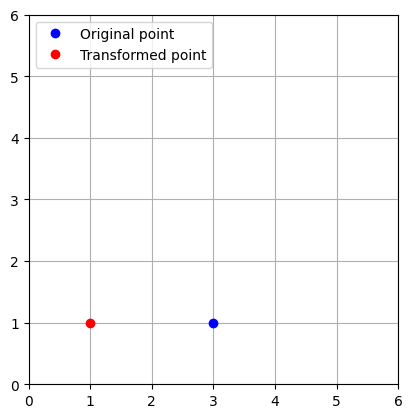

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D point with homogeneous coordinates
point = np.array([3, 1, 1])

# Translation matrix
translation_matrix = np.array([
    [1, 0, -2],
    [0, 1, 0],
    [0, 0, 1]
])

# Apply transformation matrices to point
transformed_point = translation_matrix @ point

# Plot original and transformed points
fig, ax = plt.subplots()
ax.plot(point[0], point[1], 'bo', label='Original point')
ax.plot(transformed_point[0], transformed_point[1], 'ro', label='Transformed point')
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.grid(True)
ax.legend(loc='upper left')
ax.set_aspect('equal')
plt.show()

## Skalierung und Rotation
Jetzt wenden wir eine Skalierungsmatrix mit einem Skalierungsfaktor von 2 an, um die Größe des Objekts zu verdoppeln, und eine Rotationsmatrix mit einem Winkel von np.pi/4 (45 Grad), um den Punkt gegen den Uhrzeigersinn zu drehen. 

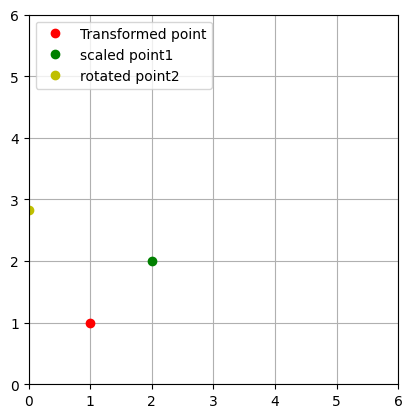

In [8]:
# Scale matrix
scale_matrix = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

# Rotation matrix
angle = np.pi/4
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])
transformed_point1 = scale_matrix @ transformed_point
transformed_point2 = rotation_matrix @ transformed_point1

# Plot original and transformed points
fig, ax = plt.subplots()
ax.plot(transformed_point[0], transformed_point[1], 'ro', label='Transformed point')
ax.plot(transformed_point1[0], transformed_point1[1], 'go', label='scaled point1')
ax.plot(transformed_point2[0], transformed_point2[1], 'yo', label='rotated point2')
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.grid(True)
ax.legend(loc='upper left')
ax.set_aspect('equal')
plt.show()

## View-Matrix im 3D Raum
Jetzt schauen wir uns ein Beispiel im dreidimensionalen Raum an. Wir definieren eine Kamera im Raum und zeigen diese als Punkt und Richtung an. Üblicherweise blickt eine Kamera in Richtung -z.
Wir erstellen eine Model-matrix für die Kamera, die diese Kamera an den Punkt 5,0,0 schiebt und so dreht, dass sie in Richtung der y-Achse blickt.

Um den Punkt jetzt in den View Space zu transformieren, wenden wir die Inverse Matrix der Camera-Model Matrix an. 

Wir nutzen die Funktion von Numpy zum invertieren, aber wir sehen:
Wenn die Basisvektoren der Transformationsmatrix orthonormal sind, dann kann man einen Trick anwenden, um die Inverse zu bilden:
Der vordere 3x3 Teil kann einfach transponiert werden (Spalten und Reihen tauschen) und der Translationspart negiert wird. 

Damit gilt für die View-Matrix für eine Kamera mit den Basisvektoren des Kamerasystems $e_{x},e_{y},e_{z}$ und der Kameraposition $p$:

$$ M_{modelcam}= \begin{bmatrix}
e_{x1} & e_{y1} & e_{z1} & p_x \\
e_{x2} & e_{y2} & e_{z2} & p_y \\
e_{x3} & e_{y2} & e_{z3} & p_z \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ M_{modelcam}^{-1}=M_{view}= \begin{bmatrix}
e_{x1} & e_{x2} & e_{x3} & -p_x \\
e_{y1} & e_{y2} & e_{y3} & -p_y \\
e_{z1} & e_{z2} & e_{z3} & -p_z \\
0 & 0 & 0 & 1
\end{bmatrix}
$$


[[ 1.  0.  0. -5.]
 [ 0.  0.  1.  0.]
 [-0. -1. -0. -0.]
 [ 0.  0.  0.  1.]]


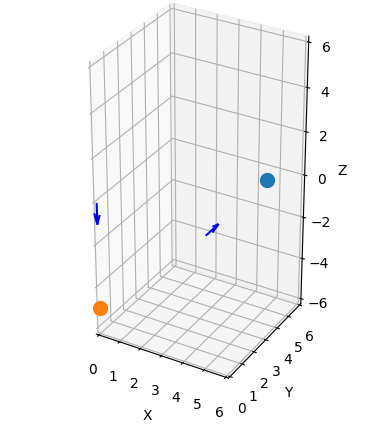

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

# Define a 3D point
point = np.array([5, 5, 0, 1])

# Define a simple camera system (we ignore the up-vector for now)
camera_origin = np.array([0, 0, 0, 1])
camera_direction = np.array([0, 0, -1, 0])

# Translation matrix
transform_matrix = np.array([
    [1, 0, 0, 5],
    [0, 0, -1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])
transformed_camera_origin =  transform_matrix @ camera_origin
transformed_camera_direction =  transform_matrix @ camera_direction

# Apply transformation matrices to point 
inv_transform_matrix = np.linalg.inv(transform_matrix)
print(inv_transform_matrix)
transformed_point = inv_transform_matrix @ point


# Plot original and transformed points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point[0], point[1], point[2], marker='o', s=100, label='Original point')
ax.scatter(transformed_point[0], transformed_point[1], transformed_point[2], marker='o', s=100, label='Transformed point')
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([-6, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create arrow object to represent camera vector
ax.quiver(camera_origin[0], camera_origin[1], camera_origin[2],
          camera_direction[0], camera_direction[1], camera_direction[2], color='blue', arrow_length_ratio=0.5)
ax.quiver(transformed_camera_origin[0], transformed_camera_origin[1], transformed_camera_origin[2],
          transformed_camera_direction[0], transformed_camera_direction[1], transformed_camera_direction[2], color='blue', arrow_length_ratio=0.5)
ax.set_aspect('equal')
plt.show()

## Projektionsmatrix

Die Projektionsmatrix is definiert als: 
$$P = \begin{bmatrix}
\frac{2n}{r-l} & 0 & \frac{r+l}{r-l} & 0 \\
0 & \frac{2n}{t-b} & \frac{t+b}{t-b} & 0 \\
0 & 0 & \frac{-(f+n)}{f-n} & \frac{-2fn}{f-n} \\
0 & 0 & -1 & 0
\end{bmatrix}$$
In diesem Code repräsentieren n und f die Entfernungen zu den Nah- und Fern- Clipping Planes , und l, r, t und b repräsentieren die Koordinaten der linken, rechten, oberen und unteren Kanten des Frustums.

Die Projektionsmatrix P bildet Punkte im 3D-Raum auf 2D-Punkte auf der Near Clipping Plane des Sichtfrustums ab. Dies wird typischerweise in der 3D-Computergrafik verwendet, um die 3D-Geometrie einer Szene in ein 2D-Bild zu transformieren, das auf einem Bildschirm angezeigt oder in eine Bilddatei gerendert werden kann.

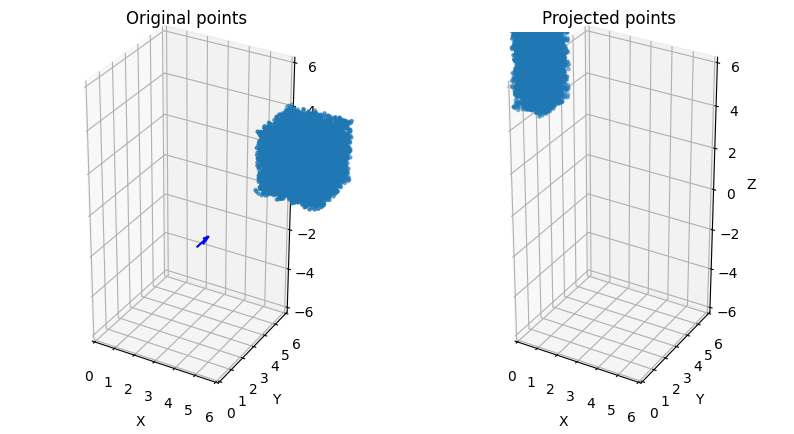

interactive(children=(FloatSlider(value=-4.0, description='Left', max=5.0, min=-5.0), FloatSlider(value=4.0, d…

<function __main__.update_projection(left, right, bottom, top, near, far, aspect_ratio)>

In [10]:
import ipywidgets as widgets
from IPython.display import display
def projection_matrix(left, right, bottom, top, near, far):
    """
    Returns the projection matrix for a perspective frustum.
    """
    width = right - left
    height = top - bottom
    depth = far - near
    n2 = 2 * near
    
    return np.array([
        [n2 / width, 0, (right + left) / width, 0],
        [0, n2 / height, (top + bottom) / height, 0],
        [0, 0, -(far + near) / depth, -2 * far * near / depth],
        [0, 0, -1, 0]
    ])

# Define the clipping planes for the perspective frustum
left, right = -4, 4
bottom, top = -3, 3
near, far = 2, 5


# Generate some random points in 3D space
num_points = 10000
points = np.random.rand(num_points, 3) * 3 
transform_matrix = np.array([
    [1, 0, 0, 5],
    [0, 1, 0, 5],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
left_slider = widgets.FloatSlider(value=left, min=-5, max=5, step=0.1, description='Left')
right_slider = widgets.FloatSlider(value=right, min=-5, max=5, step=0.1, description='Right')
bottom_slider = widgets.FloatSlider(value=bottom, min=-5, max=5, step=0.1, description='Bottom')
top_slider = widgets.FloatSlider(value=top, min=-5, max=5, step=0.1, description='Top')
near_slider = widgets.FloatSlider(value=near, min=0.1, max=10, step=0.1, description='Near')
far_slider = widgets.FloatSlider(value=far, min=1, max=50, step=1, description='Far')
aspect_ratio_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Aspect Ratio')
#display(left_slider, right_slider, bottom_slider, top_slider, near_slider, far_slider, aspect_ratio_slider)

# Apply the projection matrix to the points
points_homog = np.hstack((points, np.ones((num_points, 1))))  # Add homogeneous coordinate
points_tranformed = np.dot(transform_matrix, points_homog.T).T[:, :3] / np.expand_dims(points_homog[:, 3], axis=-1)  # Apply projection

# Plot the original and projected points
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(points_tranformed[:, 0], points_tranformed[:, 1], points_tranformed[:, 2], s=5)
ax1.quiver(transformed_camera_origin[0], transformed_camera_origin[1], transformed_camera_origin[2],
        transformed_camera_direction[0], transformed_camera_direction[1], transformed_camera_direction[2], color='blue', arrow_length_ratio=0.5)
ax1.set_title("Original points")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 6])
ax1.set_zlim([-6, 6])
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Projected points")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_xlim([0, 6])
ax2.set_ylim([0, 6])
ax2.set_zlim([-6, 6])
ax2.set_aspect('equal')
def update_projection(left, right, bottom, top, near, far, aspect_ratio):
    # Compute the projection matrix
    P = projection_matrix(left, right, bottom, top, near, far)
    T = P @ inv_transform_matrix @ transform_matrix
    points_proj = np.dot(T, points_homog.T).T[:, :3] / np.expand_dims(points_homog[:, 3], axis=-1)  # Apply projection
    ax2.scatter(points_proj[:, 0], points_proj[:, 1], points_proj[:, 2], s=5)
    fig.canvas.draw_idle()
update_projection(left, right, bottom, top, near, far, 1)
widgets.interact(update_projection, left=left_slider, right=right_slider, bottom=bottom_slider,
top=top_slider, near=near_slider, far=far_slider, aspect_ratio=aspect_ratio_slider)



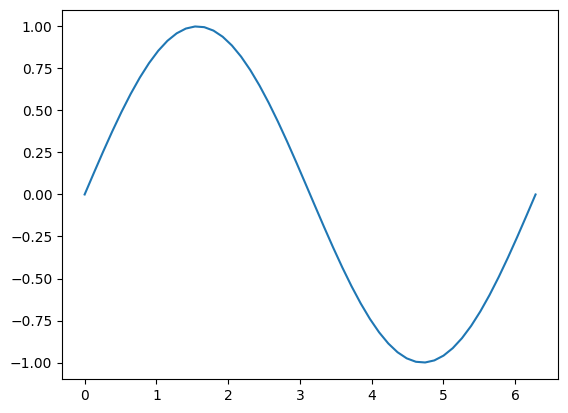

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [11]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);